In [10]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import scipy.spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [11]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [12]:
#set the root to the Shanghai dataset you download
root = 'M:/{code}/CSRNet/CSRNet-pytorch/'

In [13]:
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [14]:
img_paths = []
print(os.path)
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        print(img_path)

<module 'ntpath' from 'M:\\anaconda\\lib\\ntpath.py'>
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_1.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_10.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_11.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_12.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_13.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_14.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_15.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_16.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_17.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_18.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_19.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_2.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\imag

In [15]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_11.jpg
(686, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_12.jpg
(680, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_13.jpg
(747, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_14.jpg
(645, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_15.jpg
(768, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_16.jpg
(1024, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/train_data\images\IMG_17.jpg
(478, 600)
generate density...

generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_28.jpg
(697, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_29.jpg
(683, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_3.jpg
(427, 640)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_30.jpg
(511, 766)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_31.jpg
(615, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_32.jpg
(683, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_33.jpg
(577, 1024)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_34.jpg
(200, 300)
generate density...
done.
M:/{code}/CSRNet/CSRNet-pytorch/part_A_final/test_data\images\IMG_35.jpg
(534, 832)
genera

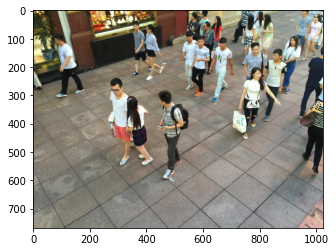

In [54]:
plt.imshow(Image.open(img_paths[54]))

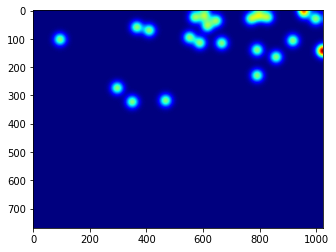

In [56]:
gt_file = h5py.File(img_paths[54].replace('.jpg','.h5')
                    .replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [57]:
np.sum(groundtruth)

23.000000000000007

In [26]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [27]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [28]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_1.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_10.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_11.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_12.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_13.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_14.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_15.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_16.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_17.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_18.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_19.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_2.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_final/train_data\images\IMG_20.jpg
M:/{code}/CSRNet/CSRNet-pytorch/part_B_f